In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from lab_setup import *
from scipy.special import digamma

In [7]:
time = np.load('temp_times.npy')
temp = np.load('temp_temp.npy').reshape(-1)

<IPython.core.display.Javascript object>


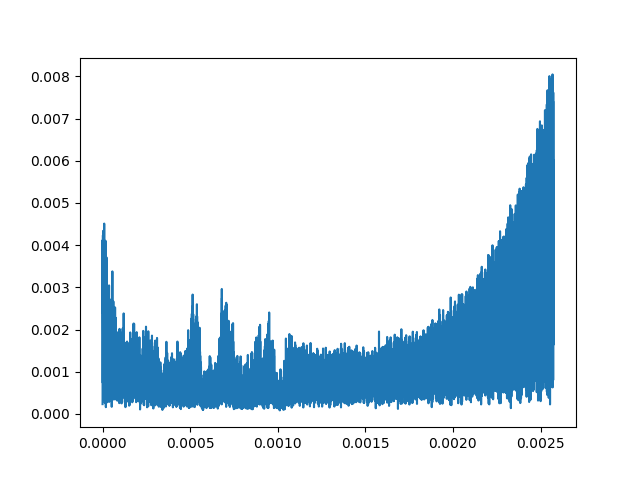

In [16]:
plt.figure()
plt.plot(time, temp)

In [11]:
cooling = temp[:10000]
eq = temp[10000:16500]
heating = temp[16500:]

<IPython.core.display.Javascript object>


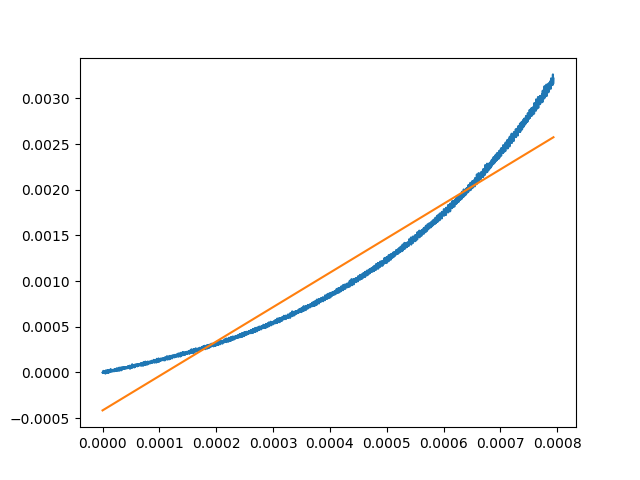

m 3.7670717394 c -0.00041486596508


In [41]:
def uniform_kernel(data, width=10):
    av = []
    for s in range(len(data)-width):
        av.append(data[s:s+width].mean())
    return np.array(av)

width = 100
heating_av = uniform_kernel(heating, width=width)

x = time[16500+width/2:-width/2]
x -= x[0]

y = heating_av
heating_av -= heating_av[0] - 1
y = np.log(heating_av)

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]

plt.figure()
plt.plot(x, y)
plt.plot(x,m*x+c)
print 'm', m, 'c', c


